In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Задача:

1) доля всех задержек ко всем вылетам

2) зависимость количества задержек от длины пути, который предстоит пролететь самолёту

3) топ 5 направлений, для которых чаще всего происходят задержки

4) в какие времена года чаще всего происходят задержки рейсов

5) топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

6) топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

7) необычную зависимость количества задержек от имеющихся данных

In [2]:
df = pd.read_csv('flight_delays.csv')
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


## 1) доля всех задержек ко всем вылетам

In [3]:
df_delay = df[(df['dep_delayed_15min'] == 'Y')]
df_delay

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
18,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y
21,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y
33,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y
35,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y
...,...,...,...,...,...,...,...,...,...
99971,c-7,c-31,c-1,2027,DL,ATL,SJC,2116,Y
99976,c-5,c-20,c-5,2117,MQ,LGA,BGR,378,Y
99980,c-4,c-28,c-4,2222,XE,EWR,DAB,884,Y
99989,c-4,c-11,c-1,1730,WN,JAN,BWI,888,Y


In [5]:
# доля всех задержек ко всем вылетам 
percent_of_delay = len(df_delay)/len(df)
percent_of_delay

0.19044

In [23]:
# построим pie-chart:
df_percent = pd.Series(data=[len(df_delay), len(df) - len(df_delay)], index = ['delay', 'no_delay'])

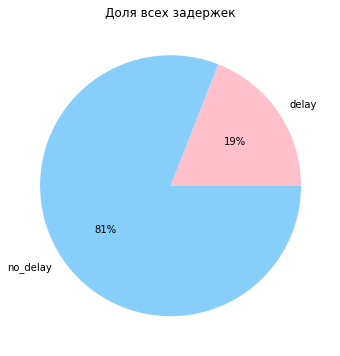

In [123]:
plt.figure(figsize=(6,6))
df_percent.plot(kind='pie', y='', autopct='%1.0f%%',
                                  colors = ['pink', 'LightSkyBlue'],
                                  title='Доля всех задержек', ylabel='');

## 2) зависимость количества задержек от длины пути, который предстоит пролететь самолёту

In [33]:
df_dist = df_delay.value_counts(df['Distance'])
df_dist

Distance
337     91
403     90
612     89
528     88
370     87
        ..
1101     1
1128     1
1134     1
1138     1
30       1
Length: 1202, dtype: int64

In [51]:
df_inddist = pd.DataFrame(df_dist.index)
df_inddist

,Distance
0,337
1,403
2,612
3,528
4,370
...,...
1197,1101
1198,1128
1199,1134
1200,1138


In [52]:
df_plus_dist = df_inddist.insert(0, 'Number_of_delays', df_dist.to_numpy())
display(df_inddist)

,Number_of_delays,Distance
0,91,337
1,90,403
2,89,612
3,88,528
4,87,370
...,...,...
1197,1,1101
1198,1,1128
1199,1,1134
1200,1,1138


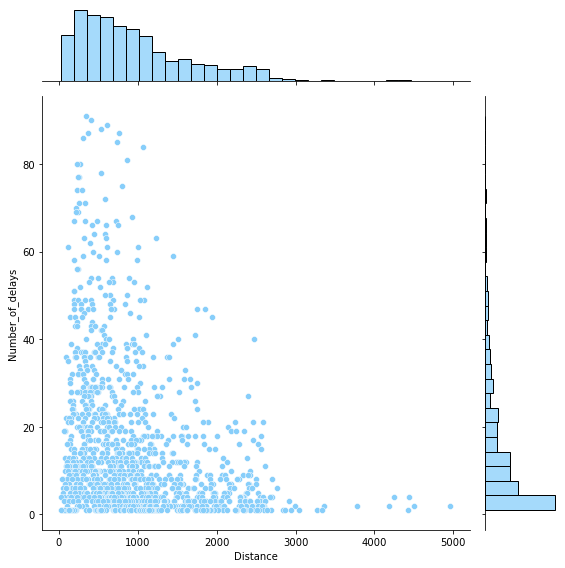

In [133]:
sns.jointplot(x='Distance', y='Number_of_delays', data=df_inddist, kind='scatter', height=8, color='LightSkyBlue');

## 3) топ 5 направлений, для которых чаще всего происходят задержки

In [69]:
df_dest = df_delay.value_counts(df_delay['Dest'])
df_dest

Dest
ATL    1281
ORD    1072
DFW     656
EWR     584
LAX     525
       ... 
GGG       1
SMX       1
HTS       1
BRW       1
ILG       1
Length: 276, dtype: int64

In [70]:
df_inddest = pd.DataFrame(df_dest.index)
df_inddest

,Dest
0,ATL
1,ORD
2,DFW
3,EWR
4,LAX
...,...
271,GGG
272,SMX
273,HTS
274,BRW


In [72]:
df_inddest.insert(1, 'Number_of_delays', df_dest.to_numpy())
df_inddest

,Dest,Number_of_delays
0,ATL,1281
1,ORD,1072
2,DFW,656
3,EWR,584
4,LAX,525
...,...,...
271,GGG,1
272,SMX,1
273,HTS,1
274,BRW,1


<Figure size 720x576 with 0 Axes>

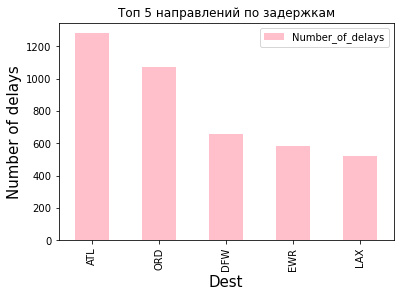

In [80]:
top5 = df_inddest[:5]
plt.figure(figsize=(10, 8))
top5.plot.bar(x='Dest', title = 'Топ 5 направлений по задержкам', color='pink')
plt.ylabel('Number of delays', fontsize = 15)
plt.xlabel('Dest', fontsize = 15)
plt.legend()
plt.show()

## 4) в какие времена года чаще всего происходят задержки рейсов

In [84]:
df_month = df_delay.value_counts(df_delay['Month'])
df_month

Month
c-7     2073
c-12    1994
c-6     1867
c-8     1783
c-3     1676
c-1     1539
c-10    1501
c-11    1397
c-2     1316
c-5     1313
c-4     1306
c-9     1279
dtype: int64

In [92]:
norm_month = []
for i in df_month.index:
    norm_month.append(int(i[2:]))
print(norm_month)

[7, 12, 6, 8, 3, 1, 10, 11, 2, 5, 4, 9]


In [103]:
df_norm_month = pd.DataFrame({'Month': norm_month})
df_norm_month

,Month
0,7
1,12
2,6
3,8
4,3
5,1
6,10
7,11
8,2
9,5


In [104]:
df_norm_month.insert(1, 'Number_of_delays', df_month.to_numpy())
df_sort_month = df_norm_month.sort_values(by = ['Month'])
df_sort_month

,Month,Number_of_delays
5,1,1539
8,2,1316
4,3,1676
10,4,1306
9,5,1313
2,6,1867
0,7,2073
3,8,1783
11,9,1279
6,10,1501


<Figure size 720x576 with 0 Axes>

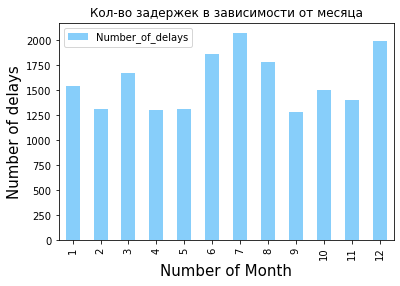

In [132]:
plt.figure(figsize=(10, 8))
df_sort_month.plot.bar(x='Month', title = 'Кол-во задержек в зависимости от месяца', color='LightSkyBlue')
plt.ylabel('Number of delays', fontsize = 15)
plt.xlabel('Number of Month', fontsize = 15)
plt.legend()
plt.show()

## 5) топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [112]:
df_uc = df_delay.value_counts(df_delay['UniqueCarrier'])
df_uc

UniqueCarrier
WN    3219
AA    1770
MQ    1448
DL    1373
UA    1322
OO    1277
US    1085
EV    1082
NW    1075
XE    1026
OH     808
CO     788
FL     736
AS     541
YV     478
B6     393
HP     196
F9     156
DH     156
TZ      64
HA      33
AQ      18
dtype: int64

In [118]:
df_induc = pd.DataFrame(df_uc.index)
df_induc.insert(1, 'Number_of_delays', df_uc.to_numpy())
top10 = df_induc[-10:]
top10

,UniqueCarrier,Number_of_delays
12,FL,736
13,AS,541
14,YV,478
15,B6,393
16,HP,196
17,F9,156
18,DH,156
19,TZ,64
20,HA,33
21,AQ,18


<Figure size 720x576 with 0 Axes>

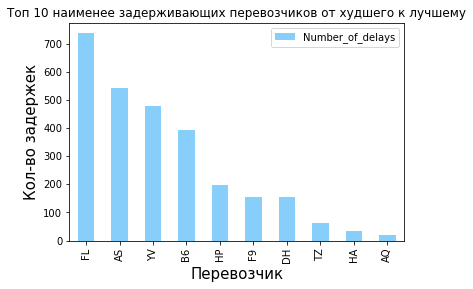

In [124]:
plt.figure(figsize=(10, 8))
top10.plot.bar(x='UniqueCarrier', title = 'Топ 10 наименее задерживающих перевозчиков от худшего к лучшему', color='LightSkyBlue')
plt.ylabel('Кол-во задержек', fontsize = 15)
plt.xlabel('Перевозчик', fontsize = 15)
plt.legend()
plt.show()

## 6) топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [126]:
df_port = df_delay.value_counts(df_delay['Origin'])
df_port

Origin
ATL    1506
ORD    1254
DFW     902
DEN     575
LAX     552
       ... 
CDC       1
SJT       1
BTM       1
BRO       1
ISO       1
Length: 269, dtype: int64

In [129]:
df_indport = pd.DataFrame(df_port.index)
df_indport.insert(1, 'Number_of_delays', df_port.to_numpy())
top_bad10 = df_indport[:10]
top_bad10

,Origin,Number_of_delays
0,ATL,1506
1,ORD,1254
2,DFW,902
3,DEN,575
4,LAX,552
5,LAS,546
6,EWR,538
7,IAH,492
8,PHX,491
9,DTW,401


<Figure size 720x576 with 0 Axes>

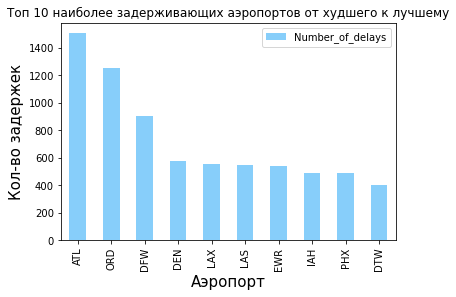

In [134]:
plt.figure(figsize=(10, 8))
top_bad10.plot.bar(x='Origin', title = 'Топ 10 наиболее задерживающих аэропортов от худшего к лучшему', color='LightSkyBlue')
plt.ylabel('Кол-во задержек', fontsize = 15)
plt.xlabel('Аэропорт', fontsize = 15)
plt.legend()
plt.show()

### 7) необычную зависимость количества задержек от имеющихся данных

Предлагаю посмотреть на зависимость кол-ва задержек от дня недели рейса, может быть, не стоит летать по понедельникам :)

In [140]:
df_day = df_delay.value_counts(df_delay['DayOfWeek'])
df_day

DayOfWeek
c-5    3285
c-4    3117
c-1    2774
c-7    2705
c-3    2567
c-2    2451
c-6    2145
dtype: int64

In [142]:
norm_day = []
for i in df_day.index:
    norm_day.append(int(i[2:]))
print(norm_day)

[5, 4, 1, 7, 3, 2, 6]


In [144]:
df_norm_day = pd.DataFrame({'DayOfWeek': norm_day})
df_norm_day

,DayOfWeek
0,5
1,4
2,1
3,7
4,3
5,2
6,6


In [145]:
df_norm_day.insert(1, 'Number_of_delays', df_day.to_numpy())
df_sort_day = df_norm_day.sort_values(by = ['DayOfWeek'])
df_sort_day

,DayOfWeek,Number_of_delays
2,1,2774
5,2,2451
4,3,2567
1,4,3117
0,5,3285
6,6,2145
3,7,2705


In [149]:
data_days = [['Mon'], ['Tues'], ['Wed'], ['Thurs'], ['Fri'], ['Sat'], ['Sun'] ]
days = pd.DataFrame(data_days)
df_sort_day.insert(2, 'Day', days.to_numpy())
df_sort_day

,DayOfWeek,Number_of_delays,Day
2,1,2774,Mon
5,2,2451,Tues
4,3,2567,Wed
1,4,3117,Thurs
0,5,3285,Fri
6,6,2145,Sat
3,7,2705,Sun


<Figure size 720x576 with 0 Axes>

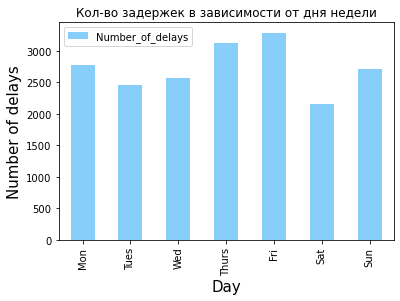

In [151]:
plt.figure(figsize=(10, 8))
df_sort_day.plot.bar(x='Day',y='Number_of_delays', title = 'Кол-во задержек в зависимости от дня недели', color='LightSkyBlue')
plt.ylabel('Number of delays', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.legend()
plt.show()

C:\Users\79651\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


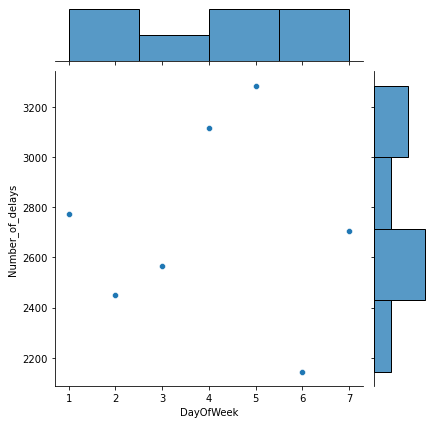

In [155]:
sns.jointplot('DayOfWeek', 'Number_of_delays', data=df_sort_day, kind="scatter");

Похоже, если полететь в пятницу, то вероятность задержки будет наиболее высокая.